# **PRAKTIKUM 11 : Convolutional Neural Network (CNN)**


**Nama    : Novita Dwi Rahmadani**

**Kelas   : TI-3F**

**NIM     : 2141720050**

===================================

### **Praktikum 1 : Klarifikasi**

**Langkah 1 - Import Library**

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Langkah 2 - Pra Pengolahan Data**

**Langkah 2.1. Pra Pengolahan Data Training**

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/ML/dataset',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 2279 images belonging to 9 classes.


**Langkah 2.2. Pra Pengolahan Data Testing**

In [6]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/ML/dataset/dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 1947 images belonging to 2 classes.


**Langkah 3 - Pembuatan Model CNN**

**Langkah 3.1.  - Inisiasi Model CNN**

In [7]:
cnn = tf.keras.models.Sequential()

**Langkah 3.2. - Pembuatan Layer Konvolusi 1**

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

**Langkah 3.3 - Pembuatan Layer Pooling 1**

In [9]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

**Langkah 3.4 - Pembuatan Layer Konvolusi 2 dan Pooling 2**

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

**Langkah 3.5 - Flattening**

In [11]:
cnn.add(tf.keras.layers.Flatten())

**Langkah 3.6 - Fully Connected Layer 1 (Input)**

In [12]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

**Langkah 3.7 - Fully Connected Layer 2 (Output)**

In [13]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

**Langkah 3.8 - Compile Model CNN**

In [14]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

**Langkah 4 - Fit CNN**

In [15]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
72/72 [==============================] - 475s 7s/step - loss: -173800.5156 - accuracy: 0.0132 - val_loss: 136762.3594 - val_accuracy: 0.4864
Epoch 2/25
72/72 [==============================] - 30s 423ms/step - loss: -10066512.0000 - accuracy: 0.0132 - val_loss: 4100105.2500 - val_accuracy: 0.4864
Epoch 3/25
72/72 [==============================] - 33s 463ms/step - loss: -100722768.0000 - accuracy: 0.0132 - val_loss: 28898834.0000 - val_accuracy: 0.4864
Epoch 4/25
72/72 [==============================] - 32s 450ms/step - loss: -467940800.0000 - accuracy: 0.0132 - val_loss: 110116112.0000 - val_accuracy: 0.4864
Epoch 5/25
72/72 [==============================] - 34s 477ms/step - loss: -1435407616.0000 - accuracy: 0.0132 - val_loss: 300221440.0000 - val_accuracy: 0.4864
Epoch 6/25
72/72 [==============================] - 32s 449ms/step - loss: -3474991616.0000 - accuracy: 0.0132 - val_loss: 666844480.0000 - val_accuracy: 0.4864
Epoch 7/25
72/72 [==============================] 

**Langkah 5 - Prediksi dengan 1 Citra**

In [17]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/ML/dataset/dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

1/1 [==============================] - 0s 107ms/step


### **Praktikum 2 : Klasifikasi Multi-label dengan Data CIFAT**

**Langkah 1 - Load Library**

In [18]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

**Langkah 2 - Unduh Dataset CIFAR**

In [19]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 2s 0us/step


**Langkah 3 - Verifikasi Data**

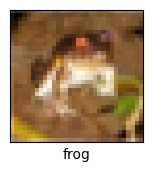

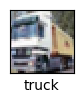

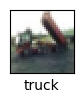

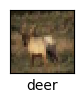

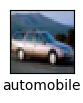

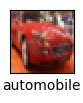

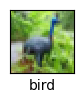

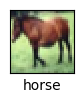

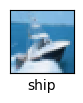

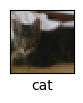

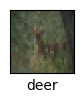

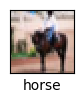

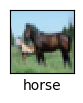

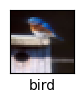

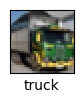

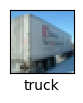

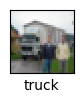

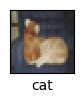

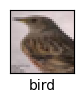

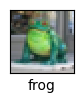

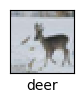

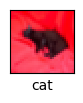

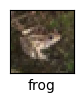

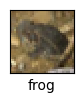

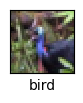

In [20]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
    plt.show()

**Langkah 4 - Buat Model CNN**

**Langkah 4.1. - Buat Layer Konvolusi**

In [21]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

**Langkah 4.2. - Cek Arsitektur Konvolusi**

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 5632

**Langkah 4.3. - Tambahkan Layer Fully Connected**

In [23]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

**Langkah 4.4. - Cek Arsitektur Model CNN**

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

**Langkah 4.5. - Compile Model CNN**

In [25]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

**Langkah 5 - Fit Model**

In [27]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 97s 62ms/step - loss: 0.5920 - accuracy: 0.7903 - val_loss: 0.8852 - val_accuracy: 0.7086
Epoch 2/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.5590 - accuracy: 0.8020 - val_loss: 0.9385 - val_accuracy: 0.7006
Epoch 3/10
1563/1563 [==============================] - 79s 50ms/step - loss: 0.5281 - accuracy: 0.8114 - val_loss: 0.9414 - val_accuracy: 0.6985
Epoch 4/10
1563/1563 [==============================] - 83s 53ms/step - loss: 0.4956 - accuracy: 0.8252 - val_loss: 0.9976 - val_accuracy: 0.6930
Epoch 5/10
1563/1563 [==============================] - 79s 50ms/step - loss: 0.4709 - accuracy: 0.8332 - val_loss: 0.9448 - val_accuracy: 0.7043
Epoch 6/10
1563/1563 [==============================] - 79s 50ms/step - loss: 0.4473 - accuracy: 0.8385 - val_loss: 1.0291 - val_accuracy: 0.6944
Epoch 7/10
1563/1563 [==============================] - 84s 54ms/step - loss: 0.4193 - accuracy: 0.8492 - val_loss: 1.0634 -

**Langkah 6 - Evaluasi Model**

313/313 - 4s - loss: 1.1816 - accuracy: 0.6843 - 4s/epoch - 13ms/step


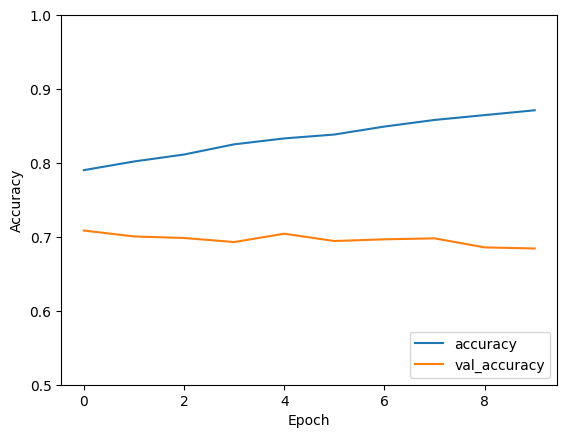

In [28]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

**Langkah 7 - Cetak Hasil Akurasi**

In [29]:
print(test_acc)

0.6843000054359436


### **Tugas**

* Modifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%.
* Buatlah model CNN untuk klasifikasi dataset MNIST.

In [ ]:
# Modifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%.

import tensorflow as tf
from tensorflow.keras.datasets import cifar10

# Muat dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalisasi nilai pixel menjadi antara 1 dan 0
train_images, test_images = train_images / 255.0, test_images / 255.0

# Tentukan model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

# Kompilasi model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Latih model
history = model.fit(train_images, train_labels, epochs=25,
                    validation_data=(test_images, test_labels))

# Tampilkan nilai akurasi
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Epoch 1/25
1563/1563 [==============================] - 90s 57ms/step - loss: 1.5992 - accuracy: 0.4060 - val_loss: 1.3183 - val_accuracy: 0.5269
Epoch 2/25
1563/1563 [==============================] - 90s 58ms/step - loss: 1.2286 - accuracy: 0.5615 - val_loss: 1.0689 - val_accuracy: 0.6225
Epoch 3/25
1563/1563 [==============================] - 84s 54ms/step - loss: 1.0700 - accuracy: 0.6237 - val_loss: 0.9595 - val_accuracy: 0.6612
Epoch 4/25
1563/1563 [==============================] - 85s 55ms/step - loss: 0.9677 - accuracy: 0.6591 - val_loss: 0.9684 - val_accuracy: 0.6631
Epoch 5/25
1563/1563 [==============================] - 86s 55ms/step - loss: 0.8946 - accuracy: 0.6863 - val_loss: 0.8852 - val_accuracy: 0.6943
Epoch 6/25
1563/1563 [==============================] - 89s 57ms/step - loss: 0.8336 - accuracy: 0.7109 - val_loss: 0.8917 - val_accuracy: 0.6921
Epoch 7/25
1563/1563 [==============================] - 86s 55ms/step - loss: 0.7927 - accuracy: 0.7236 - val_loss: 0.8499 -

In [31]:
# Buatlah model CNN untuk klasifikasi dataset MNIST

import tensorflow as tf

# Muat dataset MNIST
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalisasi nilai piksel menjadi antara 0 dan 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Reshape data agar sesuai dengan model
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

# Tentukan model CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Kompilasi model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Latih model
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))



11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 79s 41ms/step - loss: 0.1309 - accuracy: 0.9600 - val_loss: 0.0469 - val_accuracy: 0.9846
Epoch 2/5
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0419 - accuracy: 0.9867 - val_loss: 0.0332 - val_accuracy: 0.9884
Epoch 3/5
1875/1875 [==============================] - 65s 35ms/step - loss: 0.0295 - accuracy: 0.9906 - val_loss: 0.0272 - val_accuracy: 0.9922
Epoch 4/5
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0204 - accuracy: 0.9936 - val_loss: 0.0260 - val_accuracy: 0.9916
Epoch 5/5
1875/1875 [==============================] - 63s 33ms/step - loss: 0.0157 - accuracy: 0.9951 - val_loss: 0.0412 - val_accuracy: 0.9870
